In [2]:
import pickle

def save_to_pickle(data,savepath):

    with open(savepath, 'wb') as handle:

        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return None
 
def depickle(savepath):

    with open(savepath, 'rb') as handle:

        b = pickle.load(handle)

    return b
 
import pandas as pd

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from scipy.stats import genextreme
from scipy.stats import weibull_min
import matplotlib.pyplot as plt

operating_system = 'mac'

if operating_system == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')
elif operating_system == 'curnagl':
    os.chdir('/work/FAC/FGSE/IDYST/tbeucler/default/fabien/repos/cleaner_version/')
else:
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')

# Add the path to the custom library
custom_library_path = os.path.abspath('util/processing/')
sys.path.append(custom_library_path)

import time_series

custom_library_path_2 = os.path.abspath('util/gev')
sys.path.append(custom_library_path_2)

import data_processing#, vgam_loader

In [2]:
# open pickle file

datasets = depickle('data/climatology/daily_with_storms/climatology_europe_2_2.pkl')
mus_daily_with_storms = []
sigmas_daily_with_storms = []
xi_daily_with_storms = []

cluster_data_original = pd.read_csv('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.csv')
vivian = data_processing.process_daily_climatology('data/time_series_rasters_storms_15h/5_VIVIAN.tif', cluster_data_original, 'VIVIAN')

cluster_number = 3

# Process each dataset
for data in datasets:
    #data_name = data['name'].iloc[0]
    #print("Data:", data_name)

    #print('Cluster number:', cluster_number)
    
    # Group data by cluster and filter for the current cluster
    grouped_data = data.groupby('cluster_n')
    cluster_data = grouped_data.get_group(cluster_number)['wind_speed_None']
    vivian_subset = vivian[vivian['cluster_n'] == cluster_number]['wind_speed_None']

    # Fit the GEV distribution
    shape, loc, scale = weibull_min.fit(cluster_data, method="MLE")

    mus_daily_with_storms.append(loc)
    sigmas_daily_with_storms.append(scale)
    xi_daily_with_storms.append(shape)

KeyError: 'cluster_n'

In [30]:
#datasets[0]['i10fg'].plot()
test_dataframe = time_series.tif_to_dataframe(datasets[0]['i10fg'].squeeze())
peutetre = pd.DataFrame(datasets[0]['i10fg'].squeeze())
import rasterio

# Create a list to store data
data_list = []
transform = '0.25'
nodata_value = np.nan

# Loop through each pixel
for row in range(peutetre.shape[0]):
    for col in range(peutetre.shape[1]):
        # Get the wind speed value
        value = peutetre.iloc[row, col]
        
        # Skip if it's a no-data value
        if value == nodata_value or value is None:
            continue
        
        # Get the coordinates for this pixel
        x, y = rasterio.transform.xy(transform, row, col, offset='center')
        
        # Append the value and coordinates
        data_list.append({f'wind_speed_': value, 'longitude': x, 'latitude': y})

# Convert the list into a DataFrame
df = pd.DataFrame(data_list)

An error occurred: invalid path or file: <xarray.DataArray 'i10fg' (latitude: 153, longitude: 209)> Size: 256kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * longitude    (longitude) float64 2kB -12.0 -11.75 -11.5 ... 39.5 39.75 40.0
  * latitude     (latitude) float64 1kB 71.0 70.75 70.5 ... 33.5 33.25 33.0
    band         int64 8B 1
    spatial_ref  int64 8B ...


ValueError: GCPTransformer requires sequence of GroundControlPoint

In [3]:
import pandas as pd

# Example list of xarray datasets
# Assuming `datasets` is a list of xarray datasets
# Each dataset contains 'lon', 'lat', and a variable (e.g., 'wind_speed')

dataframes = []  # To store the resulting DataFrames

for ds in datasets:
    # Extract the variable of interest (e.g., 'wind_speed')
    variable_name = 'i10fg'  # Replace with your variable name
    if variable_name not in ds.data_vars:
        raise ValueError(f"Variable '{variable_name}' not found in dataset.")
    
    # Extract lon, lat, and variable
    lon = ds['longitude'].values
    lat = ds['latitude'].values
    variable = ds[variable_name].values  # Assume this is a 2D or 3D array

    # Create a meshgrid for lon and lat (if variable is 2D/3D)
    lon_grid, lat_grid = np.meshgrid(lon, lat, indexing='ij')

    # Flatten the arrays
    lon_flat = lon_grid.flatten()
    lat_flat = lat_grid.flatten()
    variable_flat = variable.flatten()

    # Create a DataFrame
    df = pd.DataFrame({
        'longitude': lon_flat,
        'latitude': lat_flat,
        variable_name: variable_flat
    })

    # Append to the list of DataFrames
    dataframes.append(df)

df_processed = []

'''for df in dataframes:
    temp = data_processing.process_daily_climatology(df, cluster_data_original, 'dm_with_storms')
    df_processed.append(temp)'''

       longitude  latitude  i10fg
0          -12.0     71.00    NaN
1          -12.0     70.75    NaN
2          -12.0     70.50    NaN
3          -12.0     70.25    NaN
4          -12.0     70.00    NaN
...          ...       ...    ...
31972       40.0     34.00    NaN
31973       40.0     33.75    NaN
31974       40.0     33.50    NaN
31975       40.0     33.25    NaN
31976       40.0     33.00    NaN

[31977 rows x 3 columns]
An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is try

An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name
/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df.loc[idx, 'cluster_n'] = cluster_value.values[0]


An error occurred while processing the tif file.
Taking the file_path as a dataframe


/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/util/gev/data_processing.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatology_df['name'] = name


In [40]:
file_path = dataframes[0]
lat_min=35, 
lat_max=75, 
lon_min=-10, 
lon_max=25
cluster_data = cluster_data_original
name = 'dm_with_storms'

climatology_df = time_series.tif_to_dataframe(file_path)#, '02_02')
try:
    climatology_df = climatology_df.dropna()
except Exception as e:
    #print(f"Error loading {file_path}: {e}")
    print ('Taking the file_path as a dataframe')
    climatology_df = file_path
    climatology_df_no_na = climatology_df.dropna()

# Filter by latitude and longitude boundaries
climatology_df_cut_CUT = climatology_df_no_na[
    (climatology_df_no_na['latitude'] >= lat_min) & (climatology_df_no_na['latitude'] <= lat_max) &
    (climatology_df_no_na['longitude'] >= lon_min) & (climatology_df_no_na['longitude'] <= lon_max)
]

# Add cluster number
for idx, row in climatology_df_cut.iterrows():
    lat, lon = row['latitude'], row['longitude']
    cluster_value = cluster_data.loc[
        (cluster_data['Latitude'] == lat) & (cluster_data['Longitude'] == lon), 'cluster_n'
    ]
    if not cluster_value.empty:
        climatology_df_cut.loc[idx, 'cluster_n'] = cluster_value.values[0]

# Assign name
climatology_df_cut.loc[:, 'name'] = name

An error occurred while processing the tif file.
Taking the file_path as a dataframe


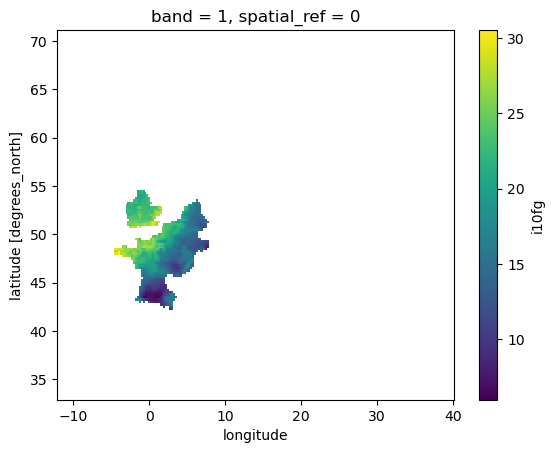

In [ ]:
datasets = depickle('data/climatology/daily_with_storms/climatology_europe_2_2.pkl')
#datasets[0]['i10fg'].plot() 

tif_15 = xr.open_dataset('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.tif',
                         engine='rasterio')
test = tif_15.rename({'x': 'longitude', 'y': 'latitude'})
test = datasets[0].where(test['band_data'] == 3)#, drop=True)
test['i10fg'].plot()

In [83]:
import pandas as pd
from scipy.stats import weibull_min

tif_15 = xr.open_dataset('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.tif',
                         engine='rasterio')
tif_15 = tif_15.rename({'x': 'longitude', 'y': 'latitude'})
datasets_2_1 = depickle('data/climatology/daily_with_storms/climatology_europe_2_1.pkl')
datasets_2_2 = depickle('data/climatology/daily_with_storms/climatology_europe_2_2.pkl')
datasets_2_3 = depickle('data/climatology/daily_with_storms/climatology_europe_2_3.pkl')

datasets_3_days = []
datasets_3_days.append(datasets_2_1)
datasets_3_days.append(datasets_2_2)
datasets_3_days.append(datasets_2_3)

datasets_winter = []
months = [10, 11, 12, 1, 2, 3]
days = np.arange(1, 32)

for month in months:
    for day in days:
        try:
            dataset = depickle(f'data/climatology/daily_with_storms/climatology_europe_{month}_{day}.pkl')
            datasets_winter.append(dataset)
        except:
            print(f'No data for month {month} and day {day}')


cluster_n = 3
dataset_wind_speed = []
for dataset in datasets_winter:
    for ds in dataset:
        ds_cluster = ds.where(tif_15['band_data'] == 3)
        # extract the wind speed data
        wind_speed = ds_cluster['i10fg']
        wind_values = wind_speed.values[~np.isnan(wind_speed.values)]
        dataset_wind_speed.extend(wind_values)  # Append values directly into the single list
    # change the dataset_wind_speed to a dataframe along one column
    #df_wind_speed = pd.DataFrame(dataset_wind_speed)
    #df_wind_speed = df_wind_speed.T

pd.DataFrame(pd.unique(pd.DataFrame(dataset_wind_speed)[0])).to_csv('data/climatology/daily_with_storms/wind_speed_cluster_3_mostly_winter.csv')


# Fit the GEV distribution
shape, loc, scale = genextreme.fit(pd.DataFrame(pd.unique(pd.DataFrame(dataset_wind_speed)[0])))

No data for month 10 and day 1
No data for month 10 and day 2
No data for month 10 and day 3
No data for month 10 and day 4
No data for month 10 and day 5
No data for month 10 and day 6
No data for month 10 and day 7
No data for month 10 and day 8
No data for month 10 and day 9
No data for month 10 and day 13
No data for month 10 and day 14
No data for month 10 and day 18
No data for month 10 and day 19
No data for month 10 and day 20
No data for month 10 and day 21
No data for month 10 and day 22
No data for month 10 and day 23
No data for month 10 and day 24
No data for month 11 and day 2
No data for month 11 and day 3
No data for month 11 and day 9
No data for month 11 and day 13
No data for month 11 and day 14
No data for month 11 and day 18
No data for month 11 and day 19
No data for month 11 and day 20
No data for month 11 and day 21
No data for month 11 and day 22
No data for month 11 and day 26
No data for month 11 and day 27
No data for month 11 and day 28
No data for month 11

In [81]:
dataset_wind_speed = []
for ds in datasets_2_2:
    ds_cluster = ds.where(tif_15['band_data'] == 3)
    # extract the wind speed data
    wind_speed = ds_cluster['i10fg']
    wind_values = wind_speed.values[~np.isnan(wind_speed.values)]
    dataset_wind_speed.extend(wind_values)

pd.DataFrame(dataset_wind_speed).to_csv('data/climatology/daily_with_storms/wind_speed_cluster_3.csv')
shape, loc, scale = genextreme.fit(pd.DataFrame(pd.unique(pd.DataFrame(dataset_wind_speed)[0])))

In [44]:
cluster_data_original = pd.read_csv('pre_processing/cluster/number_of_clusters/cleaned_cluster_15_v1.csv')
vivian = data_processing.process_daily_climatology('data/time_series_rasters_storms_15h/5_VIVIAN.tif', cluster_data_original, 'VIVIAN')
vivian_subset = vivian[vivian['cluster_n'] == cluster_n]['wind_speed_None']
max_vivian = vivian_subset.max()


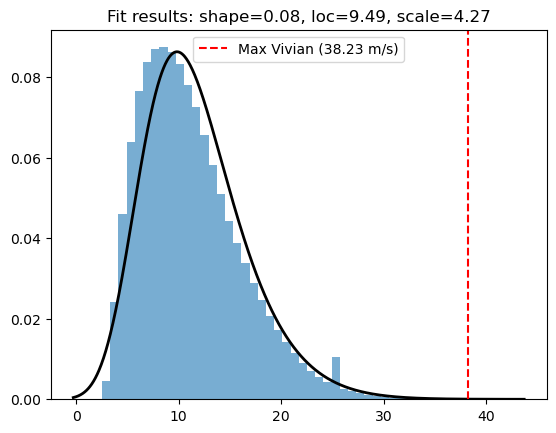

Return Period of Max Vivian Wind Gust: 12700.19 years


In [84]:
# plot the distribution
fig, ax = plt.subplots()
ax.hist(dataset_wind_speed, bins=50, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = genextreme.pdf(x, shape, loc, scale)
ax.plot(x, p, 'k', linewidth=2)
plt.axvline(max_vivian, color='red', linestyle='--', label=f"Max Vivian ({max_vivian:.2f} m/s)")
plt.legend()
title = "Fit results: shape=%.2f, loc=%.2f, scale=%.2f" % (shape, loc, scale)
ax.set_title(title)

plt.show()

# Compute return period for max_vivian
cdf_max_vivian = genextreme.cdf(max_vivian, shape, loc=loc, scale=scale)
return_period = 1 / (1 - cdf_max_vivian)
print(f"Return Period of Max Vivian Wind Gust: {return_period:.2f} years")

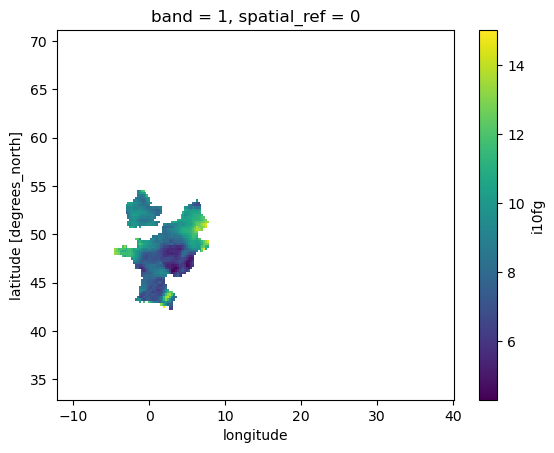

In [51]:
i10fg = wind_speed.values[~np.isnan(wind_speed.values)]
wind_speed.plot()